# Question 1: Load

* Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here\
* Please describe the structure of the data. Number of records and fields in each record?\
* Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.


In [1]:

!unzip transactions.zip

Archive:  transactions.zip
  inflating: transactions.txt        


In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
data = []

with open("transactions.txt", "r") as f:
    for line in f:
        if line.strip():  # skip empty lines
            data.append(json.loads(line))

In [4]:
data[0]

{'accountNumber': '737265056',
 'customerId': '737265056',
 'creditLimit': 5000.0,
 'availableMoney': 5000.0,
 'transactionDateTime': '2016-08-13T14:27:32',
 'transactionAmount': 98.55,
 'merchantName': 'Uber',
 'acqCountry': 'US',
 'merchantCountryCode': 'US',
 'posEntryMode': '02',
 'posConditionCode': '01',
 'merchantCategoryCode': 'rideshare',
 'currentExpDate': '06/2023',
 'accountOpenDate': '2015-03-14',
 'dateOfLastAddressChange': '2015-03-14',
 'cardCVV': '414',
 'enteredCVV': '414',
 'cardLast4Digits': '1803',
 'transactionType': 'PURCHASE',
 'echoBuffer': '',
 'currentBalance': 0.0,
 'merchantCity': '',
 'merchantState': '',
 'merchantZip': '',
 'cardPresent': False,
 'posOnPremises': '',
 'recurringAuthInd': '',
 'expirationDateKeyInMatch': False,
 'isFraud': False}

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


Some of these columns dont seem to have values in them

In [7]:
df["transactionDateTime"] = pd.to_datetime(df["transactionDateTime"])
df["accountOpenDate"] = pd.to_datetime(df["accountOpenDate"])
df["dateOfLastAddressChange"] = pd.to_datetime(df["dateOfLastAddressChange"])
df["currentExpPeriod"] = pd.to_datetime(df["currentExpDate"], format="%m/%Y")
numerical_columns = df.select_dtypes(include=[np.number, "datetime64[ns]"]).columns
categorical_columns = df.select_dtypes(exclude=[np.number, "datetime64[ns]"]).columns

In [8]:
df.describe()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,accountOpenDate,dateOfLastAddressChange,currentBalance,currentExpPeriod
count,786363.000000,786363.000000,786363,786363.000000,786363,786363,786363.000000,786363
mean,10759.464459,6250.725369,2016-07-06 01:58:58.395681536,136.985791,2014-02-03 01:11:17.352825856,2015-04-14 06:46:41.127723520,4508.739089,2026-09-25 23:50:42.724542720
min,250.000000,-1005.630000,2016-01-01 00:01:02,0.000000,1989-08-22 00:00:00,1989-08-22 00:00:00,0.000000,2019-12-01 00:00:00
25%,5000.000000,1077.420000,2016-04-06 19:35:07,33.650000,2013-06-29 00:00:00,2014-10-08 00:00:00,689.910000,2023-05-01 00:00:00
50%,7500.000000,3184.860000,2016-07-08 05:03:57,87.900000,2014-09-05 00:00:00,2016-01-13 00:00:00,2451.760000,2026-10-01 00:00:00
75%,15000.000000,7500.000000,2016-10-05 13:52:03.500000,191.480000,2015-05-04 00:00:00,2016-06-06 00:00:00,5291.095000,2030-03-01 00:00:00
max,50000.000000,50000.000000,2016-12-30 23:59:45,2011.540000,2015-12-31 00:00:00,2016-12-30 00:00:00,47498.810000,2033-08-01 00:00:00
std,11636.174890,8880.783989,NaN,147.725569,NaN,NaN,6457.442068,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  object        
 1   customerId                786363 non-null  object        
 2   creditLimit               786363 non-null  float64       
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                786363 non-null  object        
 8   merchantCountryCode       786363 non-null  object        
 9   posEntryMode              786363 non-null  object        
 10  posConditionCode          786363 non-null  object        
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

In [10]:
len(df), len(df.columns)

(786363, 30)

In [11]:
def summarize(df):
    numeric_stats = {}
    categorical_stats = {}

    for col in numerical_columns:
        s = df[col]
        nulls = s.isnull().sum()
        uniques = s.nunique()
        numeric_stats[col] = {
            "Null Count": nulls,
            "Unique Values": uniques,
            "Min": s.min(),
            "Max": s.max(),
            "Mean": s.mean(),
            "Median": s.median(),
        }
    for col in categorical_columns:
        s = df[col]
        nulls = s.isnull().sum()
        uniques = s.nunique()
        empty_strings = (s == "").sum()
        categorical_stats[col] = {
            "Null Count": nulls,
            "Unique Values": uniques,
            "Most Frequent": s.mode().iloc[0] if not s.mode().empty else "N/A",
            "Frequency Count" : s.value_counts().iloc[0] if not s.value_counts().empty else "N/A",
            "Empty String Count": empty_strings,
        }

    numeric_df = pd.DataFrame(numeric_stats).T
    categorical_df = pd.DataFrame(categorical_stats).T

    return numeric_df, categorical_df

In [12]:
num_cols_stats, cat_cols_stats = summarize(df)

# Answer 1:



The data is provided as a .txt file containing line-delimited JSON. Each line represents a credit card transaction and is structured as a JSON object.\
There are 786,363 records and 29 fields in each record.

Some statistics for each of the fields are below, split by whether numerical or categorical. It is worth noting that while there are no null values in any of the columns, there are some columns in the categorical data which have empty strings, with some of them being entirely empty. It might be beneficial to drop them entirely during later analysis and feature engineering.


In [ ]:
num_cols_stats

,Null Count,Unique Values,Min,Max,Mean,Median
creditLimit,0.0,10.0,250.0,50000.0,10759.464459,7500.0
availableMoney,0.0,521916.0,-1005.63,50000.0,6250.725369,3184.86
transactionDateTime,0,776637,2016-01-01 00:01:02,2016-12-30 23:59:45,2016-07-06 01:58:58.395681536,2016-07-08 05:03:57
transactionAmount,0.0,66038.0,0.0,2011.54,136.985791,87.9
accountOpenDate,0,1820,1989-08-22 00:00:00,2015-12-31 00:00:00,2014-02-03 01:11:17.352825856,2014-09-05 00:00:00
dateOfLastAddressChange,0,2184,1989-08-22 00:00:00,2016-12-30 00:00:00,2015-04-14 06:46:41.127723520,2016-01-13 00:00:00
currentBalance,0.0,487318.0,0.0,47498.81,4508.739089,2451.76
currentExpPeriod,0,165,2019-12-01 00:00:00,2033-08-01 00:00:00,2026-09-25 23:50:42.724542720,2026-10-01 00:00:00


In [ ]:
cat_cols_stats

,Null Count,Unique Values,Most Frequent,Frequency Count,Empty String Count
accountNumber,0,5000,380680241,32850,0
customerId,0,5000,380680241,32850,0
merchantName,0,2490,Uber,25613,0
acqCountry,0,5,US,774709,4562
merchantCountryCode,0,5,US,778511,724
posEntryMode,0,6,05,315035,4054
posConditionCode,0,4,01,628787,409
merchantCategoryCode,0,19,online_retail,202156,0
currentExpDate,0,165,03/2029,5103,0
cardCVV,0,899,869,33749,0


# Question 2: Plot

* Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
* Report any structure you find and any hypotheses you have about that structure.

/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


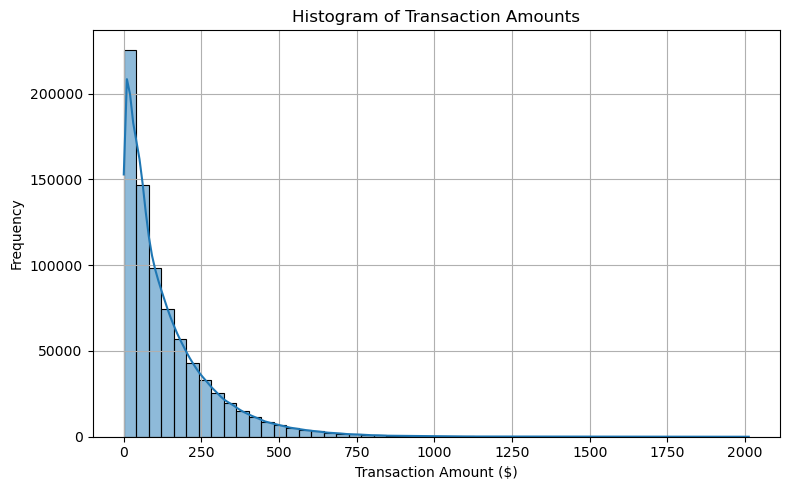

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["transactionAmount"], bins=50, kde=True)
plt.title("Histogram of Transaction Amounts")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Answer 2


The histogram is right skewed, with most transactions clustering towards the left (median=\$87.9).The longer tail extends towards higher amounts, with purchases of over \$750 being very rare. The peak of the histogram is at very low amounts, indicating most transactions are probably less than \$20.\
I suspect this is because consumers tend to spend smaller amounts more frequently rather than making large purchases regularly. These smaller transactions could be recurring daily/weekly purchases like groceries, transit, fast food, coffees as opposed to larger purchases which are often non recurring.


# Question 3: Data Wrangling - Duplicate Transactions

You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.


1.   Can you programmatically identify reversed and multi-swipe transactions?
2.   What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
3.   Did you find anything interesting about either kind of transaction?

# Identifying Reversals

In [15]:
df['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', ''], dtype=object)

In [16]:
df['transactionType'].value_counts()

,count
transactionType,
PURCHASE,745193
REVERSAL,20303
ADDRESS_VERIFICATION,20169
,698


Assumption: Since most credit card transactions will be purchase and these empty transactionType values are a very small fraction of all transactions, I will replace these with the type "PURCHASE"

In [17]:
df['transactionType'] = df['transactionType'].replace('', 'PURCHASE')

In [18]:
df_copy = df.copy()
df_copy = df_copy.sort_values(by=["accountNumber", "transactionDateTime"])

In [19]:
df_copy

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,currentExpPeriod
541900,100088067,100088067,50000.0,50000.00,2016-01-12 00:59:52,205.13,EZ Putt Putt #982199,US,US,02,...,0.00,,,,True,,,False,False,2028-04-01
541901,100088067,100088067,50000.0,49794.87,2016-01-12 19:49:41,46.43,Dinosaur Sandwitch Bar #303701,US,US,05,...,205.13,,,,True,,,False,False,2024-02-01
541902,100088067,100088067,50000.0,49748.44,2016-01-17 15:41:46,378.67,Mobile eCards,US,US,05,...,251.56,,,,False,,,False,False,2031-11-01
541903,100088067,100088067,50000.0,50000.00,2016-02-02 19:57:18,66.07,EZ Putt Putt #40513,US,US,02,...,0.00,,,,True,,,False,False,2027-12-01
541904,100088067,100088067,50000.0,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,...,66.07,,,,True,,,False,False,2030-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108111,999389635,999389635,5000.0,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,US,US,09,...,78.68,,,,True,,,False,False,2032-02-01
108112,999389635,999389635,5000.0,4653.70,2016-09-22 13:58:30,4.62,Play Store,US,US,05,...,346.30,,,,False,,,False,False,2033-04-01
108113,999389635,999389635,5000.0,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,...,325.92,,,,False,,,False,False,2033-04-01
108114,999389635,999389635,5000.0,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,...,305.54,,,,False,,,False,False,2033-04-01


I am assuming that in a lot of the cases, the reversal will be immediately preceded by the corresponding purchase i.e same amount, same merchant, same customer but opposite transactionType

In [20]:

# Sort by these columns for convenience
df_sorted = df_copy.sort_values(by=["customerId", "merchantName", "transactionDateTime"]).copy()
df_sorted = df_sorted.reset_index(drop=False)  # preserve original index
df_sorted.rename(columns={"index": "original_index"}, inplace=True)

# Find back-to-back reversal-purchase pairs by using indices
reversal_indices = df_sorted[df_sorted["transactionType"]== "REVERSAL"].index.values.astype(int)
purchase_indices = reversal_indices - 1

prev_index_df = pd.DataFrame(purchase_indices, columns=["purchase_index"])
reversal_index_df = pd.DataFrame(reversal_indices, columns=["reversal_index"])

purchase_amounts = pd.DataFrame(df_sorted.loc[purchase_indices, "transactionAmount"].values, columns=["purchase_amount"])
reversal_amounts = pd.DataFrame(df_sorted.loc[reversal_indices, "transactionAmount"].values, columns=["reversal_amount"])

# Combine and filter exact matches
quick_match_candidates = pd.concat([prev_index_df, purchase_amounts, reversal_index_df, reversal_amounts], axis=1)
# quick_match_candidates = quick_match_candidates[~(quick_match_candidates["reversal_amount"] == 0)]
quick_match_candidates["amounts_match"] = quick_match_candidates[["purchase_amount", "reversal_amount"]].apply(lambda x: x[0] == x[1], axis=1)

# Capture matched indices from fast pass
fast_reversal_indices = quick_match_candidates.loc[quick_match_candidates["amounts_match"], "reversal_index"].values
fast_purchase_indices = quick_match_candidates.loc[quick_match_candidates["amounts_match"], "purchase_index"].values
fast_matched_indices = np.concatenate((fast_reversal_indices, fast_purchase_indices))

# Extract rows from original DataFrame
fast_matches = df_sorted.loc[fast_matched_indices, ["original_index", "customerId", "merchantName", "transactionAmount", "transactionDateTime", "transactionType"]]
fast_matches = fast_matches.sort_values(by=["customerId", "merchantName", "transactionDateTime"])

# Remove matched indices from original data
matched_indices = fast_matches["original_index"].unique()
df_unmatched = df_copy.drop(index=matched_indices)

<ipython-input-20-3d2f57c4706e>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  quick_match_candidates["amounts_match"] = quick_match_candidates[["purchase_amount", "reversal_amount"]].apply(lambda x: x[0] == x[1], axis=1)


In [21]:
fast_matches

,original_index,customerId,merchantName,transactionAmount,transactionDateTime,transactionType
12,541963,100088067,AMC #79863,22.32,2016-11-20 07:57:05,PURCHASE
13,541964,100088067,AMC #79863,22.32,2016-11-20 08:00:04,REVERSAL
125,87919,100328049,Lyft,43.74,2016-01-15 20:34:35,PURCHASE
126,87920,100328049,Lyft,43.74,2016-01-15 20:36:18,REVERSAL
141,87935,100328049,McDonalds #423357,284.97,2016-03-24 22:57:15,PURCHASE
...,...,...,...,...,...,...
786232,670109,999283629,Franks Sandwitch Bar,150.58,2016-11-19 18:48:08,REVERSAL
786243,670051,999283629,Lyft,96.56,2016-06-01 23:34:21,PURCHASE
786244,670052,999283629,Lyft,96.56,2016-06-07 18:32:39,REVERSAL
786296,670084,999283629,apple.com,407.23,2016-09-15 06:35:31,PURCHASE


fast_matches dataframe has pairs of purchases and then reversals. Hence, if there are 25254 rows here, that means half of those are reversals. Hence, out of the 20303 reversal transactions, 12627 reversal transactions have been paired with a corresponding purchase right before it.

For the remaining reversals, it means that there have been purchases between the pair of purchase and reversal. Hence, I will look at groups of customerId, merchantName and transactionAmount, split by purchases and reversals. For each reversal, I will start look for a purchase group that has the same key values and a timestamp before the reversal. Once identified, that purchase group will be removed from consideration for future reversals.

In [22]:
reversals = df_unmatched[df_unmatched["transactionType"]=="REVERSAL"].copy()
purchases = df_unmatched[df_unmatched["transactionType"]== "PURCHASE"].copy()

group_keys = ["customerId", "merchantName", "transactionAmount"]
matched_rows = []

for keys, group_reversals in tqdm(reversals.groupby(group_keys), total=reversals.groupby(group_keys).ngroups, desc="Matching reversals"):
    group_purchases = purchases[
        (purchases["customerId"] == keys[0]) &
        (purchases["merchantName"] == keys[1]) &
        (purchases["transactionAmount"] == keys[2])
    ]

    used_purchases = set()
    group_reversals = group_reversals.sort_values("transactionDateTime")

    for _, rev_row in group_reversals.iterrows():
        # Only consider purchases before this reversal
        prior_purchases = group_purchases[
            group_purchases["transactionDateTime"] < rev_row["transactionDateTime"]
        ].sort_values("transactionDateTime", ascending=False)

        for _, pur_row in prior_purchases.iterrows():
            if pur_row.name not in used_purchases:
                matched_rows.append({
                    "customerId": keys[0],
                    "merchantName": keys[1],
                    "transactionAmount": keys[2],
                    "purchase_time": pur_row["transactionDateTime"],
                    "reversal_time": rev_row["transactionDateTime"],
                    "purchase_index": pur_row.name,
                    "reversal_index": rev_row.name,
                    "time_diff_sec": (rev_row["transactionDateTime"] - pur_row["transactionDateTime"]).total_seconds()
                })
                used_purchases.add(pur_row.name)
                break
remaining_match_df = pd.DataFrame(matched_rows)
#remaining_match_df = pd.read_parquet('dataframes/remaining_match_df.parquet')

Matching reversals: 100%|██████████| 7267/7267 [36:35<00:00,  3.31it/s]


In [23]:
#remaining_match_df.to_parquet('dataframes/remaining_match_df.parquet', index=True)

I will get the indices for these identified purchases and reversals and create a df with the structure of the original df

In [24]:
fast_indices = fast_matches["original_index"].values
remaining_indices = pd.concat([
    remaining_match_df["purchase_index"],
    remaining_match_df["reversal_index"]
]).values

all_matched_indices = np.unique(np.concatenate([fast_indices, remaining_indices]))

matched_transactions_df = df_copy.loc[all_matched_indices].sort_values(by=["customerId", "merchantName", "transactionDateTime"])


In [25]:
matched_transactions_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,currentExpPeriod
541963,100088067,100088067,50000.0,49834.20,2016-11-20 07:57:05,22.32,AMC #79863,US,US,09,...,165.80,,,,True,,,False,False,2020-06-01
541964,100088067,100088067,50000.0,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,...,188.12,,,,True,,,False,False,2020-06-01
87919,100328049,100328049,5000.0,4648.84,2016-01-15 20:34:35,43.74,Lyft,US,US,09,...,351.16,,,,False,,,False,False,2027-05-01
87920,100328049,100328049,5000.0,4605.10,2016-01-15 20:36:18,43.74,Lyft,US,US,09,...,394.90,,,,False,,,False,False,2027-05-01
87935,100328049,100328049,5000.0,4077.06,2016-03-24 22:57:15,284.97,McDonalds #423357,US,US,02,...,922.94,,,,True,,,False,False,2027-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670109,999283629,999283629,2500.0,2034.10,2016-11-19 18:48:08,150.58,Franks Sandwitch Bar,US,US,09,...,465.90,,,,True,,,False,False,2030-03-01
670051,999283629,999283629,2500.0,2500.00,2016-06-01 23:34:21,96.56,Lyft,US,US,05,...,0.00,,,,False,,,False,False,2029-06-01
670052,999283629,999283629,2500.0,2403.44,2016-06-07 18:32:39,96.56,Lyft,US,US,05,...,96.56,,,,False,,,False,False,2029-06-01
670084,999283629,999283629,2500.0,1775.48,2016-09-15 06:35:31,407.23,apple.com,US,US,05,...,724.52,,,,False,,,False,False,2030-06-01


In [26]:
matched_transactions_df.to_parquet('dataframes/all_matched_reversals.parquet', index=True)

# Identifying Multiswipes

In [27]:
df_copy = df.copy()

In [28]:
#Filter purchases
purchase_df = df_copy[df_copy["transactionType"].str.upper() == "PURCHASE"].copy()
#Sort
purchase_df = purchase_df.sort_values(by=["customerId", "merchantName", "transactionAmount", "transactionDateTime"])

In [29]:
purchase_df["is_duplicate"] = purchase_df.duplicated(
    subset=["customerId", "merchantName", "transactionAmount"], keep=False
)

In [30]:
#Calculate the time difference between the transactions with the same customerId, merchantName, and transactionAmount
purchase_df["timeDiff"] = purchase_df.groupby(
    ["customerId", "merchantName", "transactionAmount"]
)["transactionDateTime"].diff().dt.total_seconds()

In [31]:
purchase_df['timeDiff']

,timeDiff
541917,NaN
541962,NaN
541920,NaN
541904,NaN
541925,NaN
...,...
108113,2688551.0
108114,2705645.0
108115,2609864.0
108109,NaN


These NaN values indicate the first of the multiswipe transaction since no prior for time difference and hence have NaN.

In [32]:
for delta in [120,140,150,180,240,300]:
  print(len(purchase_df[
    (purchase_df["is_duplicate"]) &
    (purchase_df["timeDiff"] <= delta)
]))

4944
5765
6172
7457
7457
7457


Since 180 seconds i.e 3 minutes is a reasonable time to assume for classifying as multiswipe and there aren't more up until 5 minutes, after which it seems unreasonable to attempt to classify as multiswipe, I chose 3 minutes as the threshold.\
Since the first occurences of a multiswipe have timeDiff as NaN, the comparison with 180 will always return False, and I dont need to worry about not including the first occurences.

In [33]:
multi_swipe_candidates = purchase_df[
    (purchase_df["is_duplicate"]) &
    (purchase_df["timeDiff"] <= 180)
].copy()
multi_swipe_candidates = multi_swipe_candidates.sort_values(
    by=["customerId", "merchantName", "transactionAmount", "transactionDateTime"]
)
multi_swipe_candidates

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,currentExpPeriod,is_duplicate,timeDiff
541956,100088067,100088067,50000.0,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,...,,,False,,,False,False,2019-12-01,True,2.0
151518,100737756,100737756,250.0,177.98,2016-07-10 14:32:06,43.25,34th BBQ #166379,US,US,02,...,,,True,,,False,False,2029-03-01,True,59.0
151427,100737756,100737756,250.0,-44.75,2016-01-18 01:55:28,693.50,Franks Deli,US,US,05,...,,,True,,,False,False,2025-03-01,True,4.0
151428,100737756,100737756,250.0,-535.03,2016-01-18 01:58:26,693.50,Franks Deli,US,US,05,...,,,True,,,False,False,2025-03-01,True,178.0
151513,100737756,100737756,250.0,250.00,2016-07-02 12:07:00,211.22,South Steakhouse #73819,US,US,09,...,,,True,,,False,False,2033-02-01,True,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389018,999086814,999086814,10000.0,503.05,2016-12-19 02:49:22,22.76,apple.com,US,US,05,...,,,False,,,False,False,2032-06-01,True,58.0
388400,999086814,999086814,10000.0,5450.99,2016-01-23 09:22:35,178.57,sears.com,US,US,02,...,,,False,,,False,False,2032-08-01,True,153.0
388759,999086814,999086814,10000.0,5418.98,2016-08-04 00:04:03,172.50,staples.com,US,US,05,...,,,False,,,False,False,2028-12-01,True,96.0
569654,999257059,999257059,15000.0,14177.84,2016-01-14 16:51:22,47.58,Wall Street News,US,US,09,...,,,False,,,False,False,2019-12-01,True,161.0


I will also check which of the multiswipe purchases was later reversed.

In [34]:
multi_swipe_indices = set(multi_swipe_candidates.index)
matched_indices = set(matched_transactions_df.index)
overlap_indices = multi_swipe_indices.intersection(matched_indices)
multi_swipe_reversed_df = matched_transactions_df.loc[list(overlap_indices)].copy()
multi_swipe_reversed_df = multi_swipe_reversed_df.sort_values(by=["customerId", "merchantName", "transactionDateTime"])


I will create df_flagged to keep flags for these purchase-reverse transaction and multiswipes

In [35]:
df_flagged = df.copy()
df_flagged["purchase_will_be_reversed"] = df_flagged.index.isin(
    matched_transactions_df[matched_transactions_df["transactionType"]== "PURCHASE"].index
)
df_flagged["reversal_matches_purchase"] = df_flagged.index.isin(
    matched_transactions_df[matched_transactions_df["transactionType"]== "REVERSAL"].index
)
df_flagged["is_multi_swipe"] = df_flagged.index.isin(multi_swipe_candidates.index)
df_flagged["is_multi_swipe_purchase_reversed"] = df_flagged.index.isin(multi_swipe_reversed_df.index)

# Summary

In [78]:
total_matched_amount = matched_transactions_df["transactionAmount"].sum() / 2
total_multi_swipe_amount = multi_swipe_candidates["transactionAmount"].sum()
total_reversal_amount = df_copy[df_copy.transactionType=='REVERSAL'].transactionAmount.sum()
total_multi_swipe_reversed_amount = multi_swipe_reversed_df.transactionAmount.sum()
total_multi_swipe_not_reversed_amount = total_multi_swipe_amount - total_multi_swipe_reversed_amount
total_unidentified_reversals_amount = total_reversal_amount - total_matched_amount
total_fast_reversals_amount = fast_matches[fast_matches.transactionType=="REVERSAL"].transactionAmount.sum()

total_identified_reversals = (len(matched_transactions_df))//2
total_reversals = len(df_copy[df_copy['transactionType']=='REVERSAL'])
total_unidentified_reversals = total_reversals - total_identified_reversals
total_fast_reversals = len(fast_matches[fast_matches.transactionType=="REVERSAL"])
total_multi_swipes_reversed = len(multi_swipe_reversed_df)
print(f"Total Reversals: {total_reversals}")
print(f"Identified Reversals: {total_identified_reversals}")
print(f"Total Fast Reversals: {total_fast_reversals}")
print(f"Unidentified Reversals: {total_unidentified_reversals}")
print()
print(f"Total Reversals Amount: ${total_reversal_amount:,.2f}")
print(f"Total Identified Reversals Amount: ${total_matched_amount:,.2f}")
print(f"Total Fast Reversals Amount: ${total_fast_reversals_amount:,.2f}")
print(f"Total Unidentified Reversals Amount: ${total_unidentified_reversals_amount:,.2f}")
print()
print(f"Total Multi-Swipes identified: {len(multi_swipe_candidates)}")
print(f"Total Multi-Swipes Reversed: {total_multi_swipes_reversed}")
print(f"Total Multi-Swipe Amount: ${total_multi_swipe_amount:,.2f}")
print(f"Total Multi-Swipe Reversed Amount: ${total_multi_swipe_reversed_amount:,.2f}")
print(f"Total Multi-Swipe Not Reversed Amount: ${total_multi_swipe_not_reversed_amount:,.2f}")

Total Reversals: 20303
Identified Reversals: 18165
Total Fast Reversals: 13016
Unidentified Reversals: 2138

Total Reversals Amount: $2,821,792.50
Total Identified Reversals Amount: $2,669,343.17
Total Fast Reversals Amount: $1,900,955.97
Total Unidentified Reversals Amount: $152,449.33

Total Multi-Swipes identified: 7457
Total Multi-Swipes Reversed: 152
Total Multi-Swipe Amount: $1,104,006.71
Total Multi-Swipe Reversed Amount: $25,849.02
Total Multi-Swipe Not Reversed Amount: $1,078,157.69


# Exploring Trends in Reversals

In [47]:
matched_indices = matched_transactions_df.index.values
unidentified_reversals = df.drop(index=matched_indices)[df.drop(index=matched_indices).transactionType=='REVERSAL']

In [63]:
unidentified_reversals['customerId'].value_counts().sort_values().reset_index().iloc[0]

,0
customerId,153938865
count,1


In [66]:
df[df.customerId=='153938865'][['transactionDateTime','merchantName','transactionAmount','transactionType']]

,transactionDateTime,merchantName,transactionAmount,transactionType
14024,2016-01-05 18:46:49,Eazy Repair,50.66,PURCHASE
14025,2016-01-05 23:28:04,Shell Auto Body,52.78,PURCHASE
14026,2016-02-03 11:38:58,Merchants Auto Services,74.75,PURCHASE
14027,2016-02-12 01:06:46,Shell Repair,390.98,PURCHASE
14028,2016-02-14 14:38:31,Shell Auto Body,118.46,PURCHASE
14029,2016-02-28 03:05:05,Washington Repair,368.25,PURCHASE
14030,2016-03-05 01:43:13,Convenient Tire,95.60,PURCHASE
14031,2016-03-13 22:06:32,Convenient Tire,95.60,REVERSAL
14032,2016-03-18 12:27:12,Shell Tire,13.12,PURCHASE
14033,2016-03-20 22:42:01,Eazy Tire,91.40,PURCHASE


At index 14037, there is a reversal for \$163.14 at Shell Auto Body. Preceding it, there are 3 purchases at the same merchant for \$52.78, \$118.46 and \$336.05.\
This is possibly a case where there were purchases at the same merchant totalling higher than the reversal. This is to say that a part of the total purchases was reversed.\
I suspect the 2138 unidentified reversals are of this kind too where a part of the purchase was reversed.

In [37]:
matched_transactions_df[matched_transactions_df.isFraud].transactionType.value_counts()

,count
transactionType,
REVERSAL,310
PURCHASE,304
ADDRESS_VERIFICATION,6


In [38]:
fraud_transactions_reversed = matched_transactions_df[(matched_transactions_df.isFraud) & (matched_transactions_df.transactionType=='REVERSAL')].transactionAmount.sum()
fraud_transactions_reversed

np.float64(73556.73)

Hence, from the identified reversals, I can say that at least 304 of the fraud transactions, totalling $73,556 were reversed.

In [39]:
time_diffs = []
bubble_points = []  # (time_diff_in_minutes, transactionAmount)

for i in range(0, len(matched_transactions_df) - 1, 2):
    t1 = matched_transactions_df.iloc[i]
    t2 = matched_transactions_df.iloc[i + 1]

    if {"PURCHASE", "REVERSAL"}.issubset({t1["transactionType"].upper(), t2["transactionType"].upper()}):
        diff_minutes = abs((t2["transactionDateTime"] - t1["transactionDateTime"]).total_seconds()) / 60
        time_diffs.append(diff_minutes)

        # Check if the REVERSAL transaction is marked as fraud
        if t1["transactionType"].upper() == "REVERSAL" and t1.isFraud:
            bubble_points.append((diff_minutes/60, t1["transactionAmount"]))
        elif t2["transactionType"].upper() == "REVERSAL" and t2.isFraud:
            bubble_points.append((diff_minutes/60, t2["transactionAmount"]))

mean = np.mean(time_diffs)
median = np.median(time_diffs)
minimum = np.min(time_diffs)
maximum = np.max(time_diffs)
std_dev = np.std(time_diffs)


Lets see what the graph for times for reversal looks like, and also see the time taken for the fraud transactions to be reversed as well.

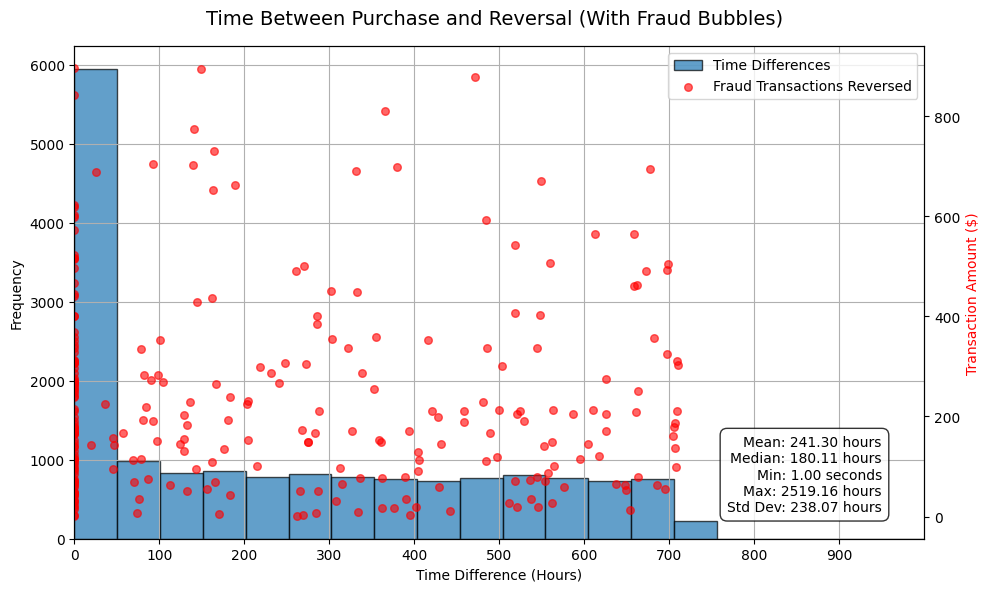

In [40]:
def format_time(mins):
    if mins < 1:
        return f"{mins * 60:.2f} seconds"
    elif mins < 60:
        return f"{mins:.2f} minutes"
    else:
        hrs = mins / 60
        return f"{hrs:.2f} hours"

stats_text = f"Mean: {format_time(mean)}\n" \
             f"Median: {format_time(median)}\n" \
             f"Min: {format_time(minimum)}\n" \
             f"Max: {format_time(maximum)}\n" \
             f"Std Dev: {format_time(std_dev)}"

# Add text box with statistics in the lower right
time_diffs = [time_diff/60 for time_diff in time_diffs]
fig, ax1 = plt.subplots(figsize=(10, 6))

# Histogram on primary y-axis
counts, bins, patches = ax1.hist(time_diffs, bins=50, edgecolor="black", alpha=0.7, label="Time Differences")
ax1.set_xlabel("Time Difference (Hours)")
ax1.set_ylabel("Frequency")
ax1.set_xticks(np.arange(0, 1000, 100))
ax1.set_xlim(0, 1000)
ax1.grid(True)

# Create second y-axis
ax2 = ax1.twinx()

# Plot fraud reversal bubbles on secondary axis
if bubble_points:
    bubble_x, bubble_y = zip(*bubble_points)
    ax2.scatter(bubble_x, bubble_y, s=30, c='red', alpha=0.6, label="Fraud Transactions Reversed")
    ax2.set_ylabel("Transaction Amount ($)", color='red')

# Titles and legend
fig.suptitle("Time Between Purchase and Reversal (With Fraud Bubbles)", fontsize=14)
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.xticks(np.arange(0,1000,100))
ax1.text(0.95, 0.05, stats_text,
         transform=ax1.transAxes,
         horizontalalignment='right',
         verticalalignment='bottom',
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))
plt.show()

We can see that most reversals happen within the first 50 hours. There are no obvious patterns for the time taken to reverse fraudulent transactions and the amount, although it is visible that often, they are reversed in a couple of hours itself, indicated by the cluster of bubbles sticking to the left.

In [67]:
df_copy[df_copy["transactionType"]=="REVERSAL"]["customerId"].value_counts().reset_index()

,customerId,count
0,380680241,907
1,882815134,384
2,570884863,300
3,246251253,277
4,369308035,211
...,...,...
3018,353388492,1
3019,346752023,1
3020,246992976,1
3021,134877960,1


It was interesting that the first customer here had 907 reversals.

In [68]:
suspicious_customer = df_flagged[df_flagged.customerId=='380680241']
suspicious_customer.isFraud.value_counts()

,count
isFraud,
False,32067
True,783


In [69]:
df_flagged.columns[-4:]

Index(['purchase_will_be_reversed', 'reversal_matches_purchase',
       'is_multi_swipe', 'is_multi_swipe_purchase_reversed'],
      dtype='object')

This customer even had 783 fraud transactions

In [70]:
flags = ["purchase_will_be_reversed", "reversal_matches_purchase", "is_multi_swipe", "is_multi_swipe_purchase_reversed"]
suspicious_customer[suspicious_customer.isFraud][flags+['transactionType']].value_counts()

purchase_will_be_reversed  reversal_matches_purchase  is_multi_swipe  is_multi_swipe_purchase_reversed  transactionType     
False                      False                      False           False                             PURCHASE                744
                           True                       False           False                             REVERSAL                 14
True                       False                      False           False                             PURCHASE                 13
False                      False                      True            False                             PURCHASE                  8
                                                      False           False                             REVERSAL                  2
                                                                                                        ADDRESS_VERIFICATION      1
True                       False                      True            True                              PURCHASE                  1
Name: count, dtype: int64

This customer had 743 fraudulent charges on his card which were never reversed. It is surprising how the card was not closed after a good number of these.

# Exploring Multiswipes

In [79]:
merchant_swipe_counts = multi_swipe_candidates["merchantName"].value_counts().reset_index()
merchant_swipe_counts.columns = ["merchantName", "multi_swipe_count"]
merchant_swipe_counts

,merchantName,multi_swipe_count
0,Uber,283
1,Lyft,227
2,apple.com,191
3,sears.com,179
4,gap.com,179
...,...,...
1278,Quizno's #39681,1
1279,McDonalds #699366,1
1280,Hardee's #35717,1
1281,Dunkin' Donuts #760100,1


<ipython-input-93-936427627925>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_merchants, x='merchantName', y='count', palette='viridis')


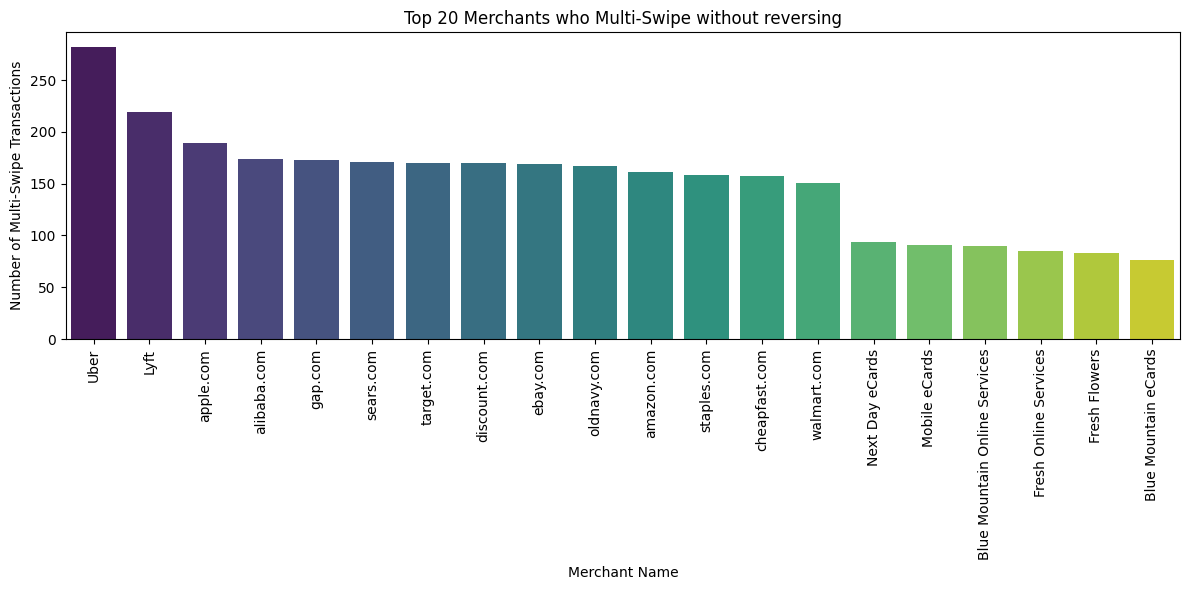

In [93]:
multi_swipe_not_reversed_df=multi_swipe_candidates.drop(index=multi_swipe_reversed_df.index)
top_merchants = multi_swipe_not_reversed_df['merchantName'].value_counts().reset_index().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_merchants, x='merchantName', y='count', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Merchant Name')
plt.ylabel('Number of Multi-Swipe Transactions')
plt.title('Top 20 Merchants who Multi-Swipe without reversing')
plt.tight_layout()
plt.show()

<ipython-input-94-db50f7df92e2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_amounts, x='merchantName', y='totalAmount', palette='magma')


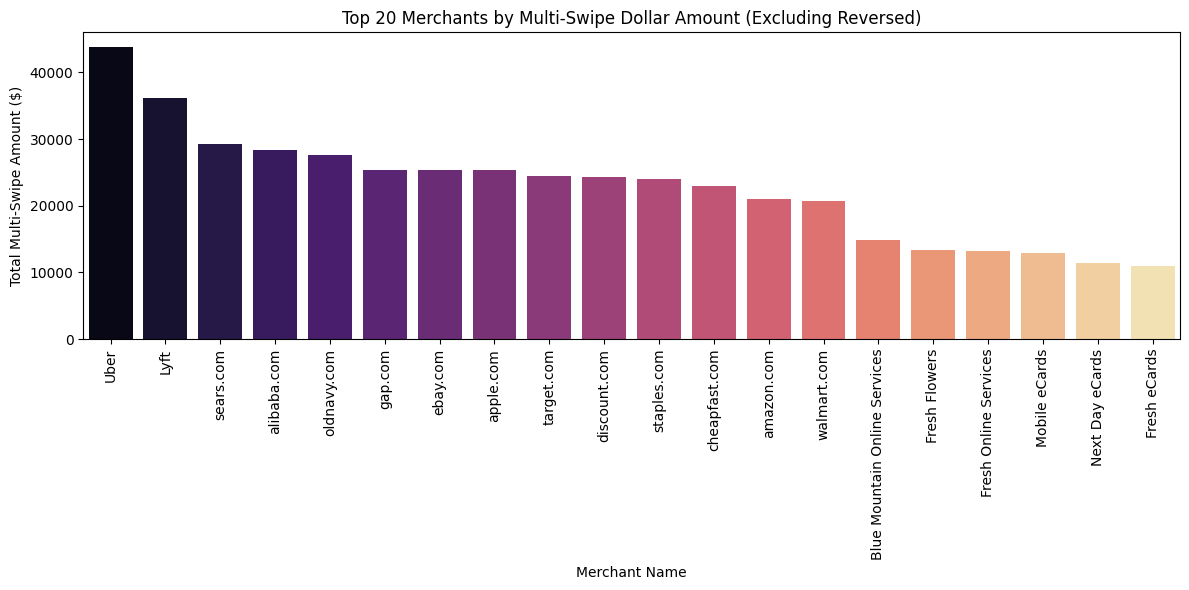

In [94]:
merchant_amounts = (
    multi_swipe_not_reversed_df.groupby('merchantName')['transactionAmount']
        .sum()
        .reset_index()
        .rename(columns={'transactionAmount': 'totalAmount'})
        .sort_values('totalAmount', ascending=False)
)

top_amounts = merchant_amounts.head(20)

# 4. Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_amounts, x='merchantName', y='totalAmount', palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Merchant Name')
plt.ylabel('Total Multi-Swipe Amount ($)')
plt.title('Top 20 Merchants by Multi-Swipe Dollar Amount (Excluding Reversed)')
plt.tight_layout()
plt.show()

We can see that rideshare apps are the highest multiswipe merchants whose transactions were not reversed, both by frequency as well as by dollar amount

# Answer 3



1.   I was able to programmatically identify reversals of purchases as well as multiswipes (within a threshold of 3 minutes)
2.   
*   Total instant reversals identified: 13016
*   Dollar Amount for identified instant reversals: \$1,900,955.97
*   Total Multiswipes identified: 7457
*   Dollar Amount for identified multiswipes: $1,104,006.71

3.  Out of the 7457 multiswipe transactions totalling \$1.1M, only 152 were reversed, totalling \$25,849.02. This means that multi-swipes happen often and rack up over a million dollars, but almost never get reversed. This could be the customers tolerating small accidental charges or them simply not noticing them, but the vendors earn a lot of money through these multi-swipes.


# Question 4: Model

Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

1. Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
2. Provide an estimate of performance using an appropriate sample, and show your work.
3. Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

# Data Cleaning

In [95]:
cat_cols_stats

,Null Count,Unique Values,Most Frequent,Frequency Count,Empty String Count
accountNumber,0,5000,380680241,32850,0
customerId,0,5000,380680241,32850,0
merchantName,0,2490,Uber,25613,0
acqCountry,0,5,US,774709,4562
merchantCountryCode,0,5,US,778511,724
posEntryMode,0,6,05,315035,4054
posConditionCode,0,4,01,628787,409
merchantCategoryCode,0,19,online_retail,202156,0
currentExpDate,0,165,03/2029,5103,0
cardCVV,0,899,869,33749,0


I will drop the columns with all empty strings.

In [96]:
drop_cols = ["posOnPremises", "recurringAuthInd", "merchantZip","merchantState","merchantCity","echoBuffer"]
df = df.drop(columns=drop_cols)

In [97]:
df[df.accountNumber != df.customerId]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,currentExpPeriod


Since accountNumber is redundant, I will drop it

In [98]:
df = df.drop(columns=["accountNumber"])

In [99]:
df.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,currentExpPeriod
0,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,...,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,2023-06-01
1,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2024-02-01
2,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2025-08-01
3,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2025-08-01
4,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,...,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2029-10-01


I will drop non fraud duplicates with a reasonable subset of columns, which will most likely be subscriptions

In [100]:
fraud_df = df[df['isFraud']]
nonfraud_df = df[~df['isFraud']].drop_duplicates(keep='first',subset = ["customerId","transactionAmount","merchantName","accountOpenDate","merchantCategoryCode","cardLast4Digits"])

In [101]:
df = pd.concat([fraud_df, nonfraud_df]).sort_index()

# Feature Engineering

Card CVV entered wrong

In [102]:
df[df.cardCVV != df.enteredCVV]["isFraud"].value_counts(normalize=True)

,proportion
isFraud,
False,0.967946
True,0.032054


In [103]:
df["cvvMatch"] = df.cardCVV == df.enteredCVV

Age of account

In [104]:
df["accountAge"] = (df.transactionDateTime - df.accountOpenDate).dt.days

Time since address was changed

In [105]:
df["sinceDateOfLastAddressChange"] = (
    df.transactionDateTime - df.dateOfLastAddressChange
).dt.days

Do country codes match

In [106]:
df["countryMatch"] = df.acqCountry == df.merchantCountryCode

Date properties

In [107]:
df["dayOfMonth"] = df.transactionDateTime.dt.day
df["month"] = df.transactionDateTime.dt.month
df["dayOfYear"] = df.transactionDateTime.dt.dayofyear
df["weekOfYear"] = df.transactionDateTime.dt.isocalendar().week
df["dayOfWeek"] = df.transactionDateTime.dt.dayofweek
df["quarter"] = df.transactionDateTime.dt.quarter
df["hour"] = df.transactionDateTime.dt.hour

Weekday or weekend

In [108]:
df["weekday"] = df.dayOfWeek < 5

What part of day (I made 4 parts)

In [109]:
df["partOfDay"] = pd.cut(df.hour, bins=4, labels=[0, 1, 2,3])

The average fraud rate for each customer based on their previous transactions — current transaction excluded.

In [110]:
df["avgFraud"] = (
    df.groupby("customerId")["isFraud"]
    .transform(lambda x: x.shift().expanding().mean())
    .fillna(0)
)

In [111]:
df.columns

Index(['customerId', 'creditLimit', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'currentExpPeriod', 'cvvMatch',
       'accountAge', 'sinceDateOfLastAddressChange', 'countryMatch',
       'dayOfMonth', 'month', 'dayOfYear', 'weekOfYear', 'dayOfWeek',
       'quarter', 'hour', 'weekday', 'partOfDay', 'avgFraud'],
      dtype='object')

I will now add some features, mainly focusing on \
1)Extracting temporal features for transaction activity \
2)Customer-Merchant Activity and Familiarity

In [112]:
# Sort data by customer and transaction time
df = df.sort_values(["customerId", "transactionDateTime"])

# Set datetime index for time-based rolling features
df = df.set_index("transactionDateTime")

# Transaction count in recent time windows
df["transactionCountLast1hr"] = df.groupby("customerId")["transactionAmount"].rolling("1h").count().reset_index(level=0, drop=True)
df["transactionCountLast24hr"] = df.groupby("customerId")["transactionAmount"].rolling("1d").count().reset_index(level=0, drop=True)
df["transactionCountLast7d"] = df.groupby("customerId")["transactionAmount"].rolling("7d").count().reset_index(level=0, drop=True)

# Amount spent in recent time windows
df["amountSpentLast24hr"] = df.groupby("customerId")["transactionAmount"].rolling("1d").sum().reset_index(level=0, drop=True)
df["amountSpentLast7d"] = df.groupby("customerId")["transactionAmount"].rolling("7d").sum().reset_index(level=0, drop=True)

#Reset index back to normal for non-rolling features
df = df.reset_index()

# Unique merchants visited today
df["date"] = df["transactionDateTime"].dt.date
df["numMerchantsVisitedToday"] = df.groupby(["customerId", "date"])["merchantName"].transform("nunique")

# Statistical amounts (past week)
df = df.sort_values(["customerId", "transactionDateTime"])
df["meanTransactionAmountPastWeek"] = df.groupby("customerId")["transactionAmount"].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)


# First transaction of the day
df["isFirstTransactionToday"] = df.groupby(["customerId", "date"]).cumcount() == 0

# Is new merchant for customer
df["isNewMerchantForCustomer"] = df.groupby("customerId")["merchantName"].transform(lambda x: ~x.duplicated())

# Merchant frequency (normalized)
merchant_freq = df["merchantName"].value_counts(normalize=True)
df["merchantTransactionFrequency"] = df["merchantName"].map(merchant_freq)

# Is Domestic transaction
df["isDomesticTransaction"] = df["acqCountry"] == df["merchantCountryCode"]

# Frequent merchant country for each customer
customer_country_mode = df.groupby("customerId")["merchantCountryCode"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
)
df["frequentMerchantCountryCode"] = df["customerId"].map(customer_country_mode)
df["isFrequentMerchantCountry"] = df["merchantCountryCode"] == df["frequentMerchantCountryCode"]

# Time since last transaction
df["timeSinceLastTransaction"] = df.groupby("customerId")["transactionDateTime"].diff().dt.total_seconds()


In [113]:
#Saving unbinned dollar amounts for later, in case
df["availableMoneyOg"] = df["availableMoney"]
df["transactionAmountOg"] = df["transactionAmount"]
# Binning available money and transaction amount
df["availableMoney"] = pd.cut(
    df.availableMoney,
    bins=[-5000, -1000, -500, -100, 0, 100, 500, 1000, 5000, 50000],
    labels=[0, 1, 2, 3, 4, 5, 6, 7, 8],
)
df["transactionAmount"] = pd.qcut(df.transactionAmount, 4, labels=[0, 1, 2, 3])

In [114]:
df.to_parquet('dataframes/df_cleaned.parquet', index=True)

# Sampling

In [32]:
import pandas as pd
df = pd.read_parquet('dataframes/df_cleaned.parquet')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import joblib

In [34]:
df.columns

Index(['transactionDateTime', 'customerId', 'creditLimit', 'availableMoney',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud', 'currentExpPeriod', 'cvvMatch',
       'accountAge', 'sinceDateOfLastAddressChange', 'countryMatch',
       'dayOfMonth', 'month', 'dayOfYear', 'weekOfYear', 'dayOfWeek',
       'quarter', 'hour', 'weekday', 'partOfDay', 'avgFraud',
       'transactionCountLast1hr', 'transactionCountLast24hr',
       'transactionCountLast7d', 'amountSpentLast24hr', 'amountSpentLast7d',
       'date', 'numMerchantsVisitedToday', 'meanTransactionAmountPastWeek',
       'isFirstTransactionToday', 'isNewMerchantForCustomer',
       'merchantTransactionFrequency',

The sampling I am doing is primarily from customers who have been victims of fraud transactions as I believe. I take all the fraud transactions from them.\
For the non fraud transactions, I sample from the same customers because I believe this will encode more information. I sample 7.5% from these non fraud cases, which I settled on after some trial and error on the models I trained below.\
For some noise, I am also 1% from the customers who never experienced fraud transactions.

In [35]:
def custom_sample(input_df):
    #Get all customers who experienced fraud
    fraud_customers = input_df[input_df["isFraud"] == True]["customerId"].unique()

    # All fraud transactions from those customers
    fraud_df = input_df[(input_df["customerId"].isin(fraud_customers)) & (input_df["isFraud"] == True)]

    # Sample 7.5% of non-fraud transactions from those same customers, based on trial and error
    nonfraud_df_from_fraud_customers = input_df[
        (input_df["customerId"].isin(fraud_customers)) & (input_df["isFraud"] == False)
    ]
    nonfraud_sampled = nonfraud_df_from_fraud_customers.sample(frac=0.075, random_state=42)

    # Sample from customers who never had fraud in 2016
    nonfraud_2016_df = input_df[
        (input_df["transactionDateTime"].dt.year == 2016)
        & (~input_df["customerId"].isin(fraud_customers))
    ]

    # Identify customers who had no fraud at all in 2016
    nonfraud_customers_2016 = nonfraud_2016_df.groupby("customerId")["isFraud"].sum()
    nonfraud_customers_2016 = nonfraud_customers_2016[nonfraud_customers_2016 == 0].index

    # Sample transactions from these clean customers to add noise
    noise_sample = input_df[input_df["customerId"].isin(nonfraud_customers_2016)].sample(frac=0.01, random_state=42)

    # Combine all three subsets
    final_sampled_df = pd.concat([fraud_df, nonfraud_sampled, noise_sample], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
    return final_sampled_df

In [36]:
final_sampled_df = custom_sample(df)

In [37]:
final_sampled_df.isFraud.value_counts()

isFraud
False    45657
True     12417
Name: count, dtype: int64

In [38]:
final_sampled_df = final_sampled_df.drop(
    [
        "currentExpDate",
        "accountOpenDate",
        "dateOfLastAddressChange",
        "cardCVV",
        "enteredCVV",
        "cardLast4Digits","currentExpPeriod","date","availableMoneyOg", "transactionAmountOg"
    ],
    axis=1,
)

# Train Test Split, preprocessers and evaluation function

In [39]:
target = "isFraud"

numeric_features = [
    "creditLimit", "availableMoney", "transactionAmount", "currentBalance",
    "accountAge", "sinceDateOfLastAddressChange", "dayOfMonth", "month",
    "dayOfYear", "weekOfYear", "dayOfWeek", "quarter", "hour", "weekday",
    "transactionCountLast1hr", "transactionCountLast24hr", "transactionCountLast7d",
    "amountSpentLast24hr", "amountSpentLast7d", "numMerchantsVisitedToday",
    "meanTransactionAmountPastWeek",
    "merchantTransactionFrequency", "timeSinceLastTransaction"
]
categorical_features = [
    "merchantName", "acqCountry", "merchantCountryCode", "posEntryMode",
    "posConditionCode", "merchantCategoryCode", "transactionType",
    "frequentMerchantCountryCode"
]
ordinal_features = [
    "cardPresent", "expirationDateKeyInMatch", "cvvMatch", "countryMatch",
    "isFirstTransactionToday", "isNewMerchantForCustomer",
    "isDomesticTransaction", "isFrequentMerchantCountry"
]
features = numeric_features+categorical_features+ordinal_features
final_sampled_df = final_sampled_df[features+[target]].dropna()
X = final_sampled_df[features]
y = final_sampled_df[target]
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42,stratify=y_train_full)

# ColumnTransformers for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
    ("ord", OrdinalEncoder(), ordinal_features)
])

In [64]:
def evaluate_pipeline(pipeline):
    y_proba = pipeline.predict_proba(X_test)[:, 1]  # probability for class 1
    y_pred = pipeline.predict(X_test)
    # Metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)

    # Output
    print(f"Precision:      {precision:.4f}")
    print(f"Recall:         {recall:.4f}")
    print(f"AUC-ROC:        {auc:.4f}")
    print(f"Train Accuracy: {train_score:.4f}")
    print(f"Test Accuracy:  {test_score:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

I'll test the performance on Logistic Regression Classifier, Random Forest Classifier and HistGradientBoostingClassifier. I am using a VarianceThreshold selector to filter features that dont vary much.

# Logistic Regression Classifier

In [10]:
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", VarianceThreshold()),
    ("classifier", LogisticRegression(max_iter = 400,class_weight="balanced", solver='newton-cg',n_jobs=-1))
])

In [11]:
%%time
# Step 6: Fit
log_reg_pipeline.fit(X_train, y_train)

CPU times: user 1.66 s, sys: 986 ms, total: 2.65 s
Wall time: 1min 43s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['creditLimit',
                                                   'availableMoney',
                                                   'transactionAmount',
                                                   'currentBalance',
                                                   'accountAge',
                                                   'sinceDateOfLastAddressChange',
                                                   'dayOfMonth', 'month',
                                                   'dayOfYear', 'weekOfYear',
                                                   'dayOfWeek', 'quarter',
                                                   'hour', 'weekday',
                                                   'transactionCountLast1hr',
                                                   'transactionCountLast24hr',
                                                   'transactio...
                                                   'frequentMerchantCountryCode']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['cardPresent',
                                                   'expirationDateKeyInMatch',
                                                   'cvvMatch', 'countryMatch',
                                                   'isFirstTransactionToday',
                                                   'isNewMerchantForCustomer',
                                                   'isDomesticTransaction',
                                                   'isFrequentMerchantCountry'])])),
                ('selector', VarianceThreshold()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=400,
                                    n_jobs=-1, solver='newton-cg'))])

In [12]:
evaluate_pipeline(log_reg_pipeline)

Precision:      0.3816
Recall:         0.7076
AUC-ROC:        0.7569
Train Accuracy: 0.7039
Test Accuracy:  0.6928
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.69      0.78      9097
        True       0.38      0.71      0.50      2469

    accuracy                           0.69     11566
   macro avg       0.64      0.70      0.64     11566
weighted avg       0.79      0.69      0.72     11566

Confusion Matrix:
[[6266 2831]
 [ 722 1747]]


# Random Forest

In [13]:

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", VarianceThreshold()),
    ("classifier", RandomForestClassifier(n_estimators=100, class_weight="balanced", n_jobs=-1, random_state=42))
])

In [14]:
%%time
rf_pipeline.fit(X_train, y_train)

CPU times: user 34.5 s, sys: 736 ms, total: 35.3 s
Wall time: 7.62 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['creditLimit',
                                                   'availableMoney',
                                                   'transactionAmount',
                                                   'currentBalance',
                                                   'accountAge',
                                                   'sinceDateOfLastAddressChange',
                                                   'dayOfMonth', 'month',
                                                   'dayOfYear', 'weekOfYear',
                                                   'dayOfWeek', 'quarter',
                                                   'hour', 'weekday',
                                                   'transactionCountLast1hr',
                                                   'transactionCountLast24hr',
                                                   'transactio...
                                                   'frequentMerchantCountryCode']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['cardPresent',
                                                   'expirationDateKeyInMatch',
                                                   'cvvMatch', 'countryMatch',
                                                   'isFirstTransactionToday',
                                                   'isNewMerchantForCustomer',
                                                   'isDomesticTransaction',
                                                   'isFrequentMerchantCountry'])])),
                ('selector', VarianceThreshold()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])

In [15]:
evaluate_pipeline(rf_pipeline)

Precision:      0.7617
Recall:         0.1385
AUC-ROC:        0.7889
Train Accuracy: 1.0000
Test Accuracy:  0.8068
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.99      0.89      9097
        True       0.76      0.14      0.23      2469

    accuracy                           0.81     11566
   macro avg       0.79      0.56      0.56     11566
weighted avg       0.80      0.81      0.75     11566

Confusion Matrix:
[[8990  107]
 [2127  342]]


# Gradient Boosting

In [16]:
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", VarianceThreshold()),
    ("classifier", HistGradientBoostingClassifier(max_iter=200,learning_rate=0.1,max_depth=3,random_state=42))
])

In [17]:
%%time
gb_pipeline.fit(X_train, y_train)

CPU times: user 1min 1s, sys: 769 ms, total: 1min 2s
Wall time: 14.3 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['creditLimit',
                                                   'availableMoney',
                                                   'transactionAmount',
                                                   'currentBalance',
                                                   'accountAge',
                                                   'sinceDateOfLastAddressChange',
                                                   'dayOfMonth', 'month',
                                                   'dayOfYear', 'weekOfYear',
                                                   'dayOfWeek', 'quarter',
                                                   'hour', 'weekday',
                                                   'transactionCountLast1hr',
                                                   'transactionCountLast24hr',
                                                   'transactio...
                                                   'frequentMerchantCountryCode']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['cardPresent',
                                                   'expirationDateKeyInMatch',
                                                   'cvvMatch', 'countryMatch',
                                                   'isFirstTransactionToday',
                                                   'isNewMerchantForCustomer',
                                                   'isDomesticTransaction',
                                                   'isFrequentMerchantCountry'])])),
                ('selector', VarianceThreshold()),
                ('classifier',
                 HistGradientBoostingClassifier(max_depth=3, max_iter=200,
                                                random_state=42))])

In [18]:
evaluate_pipeline(gb_pipeline)

Precision:      0.6703
Recall:         0.2503
AUC-ROC:        0.7815
Train Accuracy: 0.8180
Test Accuracy:  0.8137
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.97      0.89      9097
        True       0.67      0.25      0.36      2469

    accuracy                           0.81     11566
   macro avg       0.75      0.61      0.63     11566
weighted avg       0.79      0.81      0.78     11566

Confusion Matrix:
[[8793  304]
 [1851  618]]


Once I got a general idea of how the models perform, I did a grid search.\
In case of fraud detection, it is important to be able to correctly identify fraud cases. But the fraud transactions are very underrepresented (~2%) in the data.\
The training and test data has been prepared such that the fraud cases are still underrepresented but the extent has been reduced to allow the model to meaningfully learn to be able to identify them. \
Aiming for a very high recall will mean a trade-off in terms of precision. While false positives are not as costly as false negatives in the case of fraud detection, a really low precision will quickly rack up enough costs for the bank due to the number of transactions that the bank processes in a year. Hence, I am doing the grid search with objective of maximizing the ROC-AUC score to find that model that best balances the TPR and FPR, so that I can identify which of the three models and at what parameters should I use. \
In fraud detection, the probabilities given by the model for fraud cases will be lower since it is so rare and the conventional threshold of 0.5 will hamper the model performance. Hence, I will be setting a custom threshold on the model with the best ROC-AUC since that model will be able to distinguish between the classes the best at different thresholds, allowing me to test which threshold balances Precision and Recall the best. \
Hence, the plan is: Find model with best ROC-AUC using train data --> Check F1 score with validation data at different thresholds to choose best threshold -> Use that threshold to make predictions on test data and get final metrics


# GridSearch ROC AUC

In [41]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {
    'classifier__C': [0.001,0.01, 0.1, 1, 10,100],
    'classifier__solver': ['newton-cg', 'lbfgs'],
    'classifier__max_iter': [100]
}

# Random Forest
rf_params = {
    'classifier__n_estimators': [80,160, 240],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [4,5,6]
}


# GradientBoostingClassifier
gb_params = {
    'classifier__learning_rate': [0.001,0.01, 0.1],
    'classifier__max_depth': [None, 10,20],
}

log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", VarianceThreshold()),
    ("classifier", LogisticRegression(random_state=42))
])
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", VarianceThreshold()),
    ("classifier", RandomForestClassifier(random_state=42))
])
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", VarianceThreshold()),
    ("classifier", HistGradientBoostingClassifier(random_state=42))
])

# Logistic Regression Grid Search
log_reg_grid = GridSearchCV(log_reg_pipeline, log_reg_params, cv=5,scoring='roc_auc', n_jobs=-1,verbose=3)

# Random Forest Grid Search
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='roc_auc', n_jobs=-1,verbose=3)

# GradientBoosting Grid Search
gb_grid = GridSearchCV(gb_pipeline, gb_params, cv=5, scoring='roc_auc', n_jobs=-1,verbose=3)

In [42]:
%%time
log_reg_grid.fit(X_train, y_train)
joblib.dump(log_reg_grid.best_estimator_, "models/log_reg_grid_auc_roc.pkl")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 3/5] END classifier__C=0.001, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.721 total time=  19.7s
[CV 3/5] END classifier__C=0.01, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.738 total time=  25.5s
[CV 3/5] END classifier__C=0.01, classifier__max_iter=100, classifier__solver=lbfgs;, score=0.738 total time=  10.9s
[CV 4/5] END classifier__C=0.1, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.757 total time=  46.2s
[CV 3/5] END classifier__C=1, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.754 total time= 1.5min
[CV 3/5] END classifier__C=10, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.747 total time= 3.9min
[CV 3/5] END classifier__C=100, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.741 total time=11.5min
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_split=4, classifier__n_estimators=80;, score=0.821 total time=  18.9s
[CV 3/5] END classifier__max

['log_reg_grid_auc_roc.pkl']

In [43]:
%%time
rf_grid.fit(X_train, y_train)
joblib.dump(rf_grid.best_estimator_, "models/rf_grid_auc_roc.pkl")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 5/5] END classifier__C=0.001, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.725 total time=  18.3s
[CV 5/5] END classifier__C=0.001, classifier__max_iter=100, classifier__solver=lbfgs;, score=0.725 total time=   8.4s
[CV 1/5] END classifier__C=0.01, classifier__max_iter=100, classifier__solver=lbfgs;, score=0.753 total time=  10.8s
[CV 2/5] END classifier__C=0.01, classifier__max_iter=100, classifier__solver=lbfgs;, score=0.760 total time=  10.6s
[CV 5/5] END classifier__C=0.01, classifier__max_iter=100, classifier__solver=lbfgs;, score=0.745 total time=  10.6s
[CV 1/5] END classifier__C=0.1, classifier__max_iter=100, classifier__solver=lbfgs;, score=0.760 total time=  11.0s
[CV 2/5] END classifier__C=0.1, classifier__max_iter=100, classifier__solver=lbfgs;, score=0.769 total time=  10.8s
[CV 3/5] END classifier__C=0.1, classifier__max_iter=100, classifier__solver=lbfgs;, score=0.746 total time=  11.0s

['rf_grid_auc_roc.pkl']

In [44]:
%%time
gb_grid.fit(X_train, y_train)
joblib.dump(gb_grid.best_estimator_, "models/gb_grid_auc_roc.pkl")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: user 1min 9s, sys: 6.19 s, total: 1min 15s
Wall time: 8min 15s


['gb_grid_auc_roc.pkl']

In [45]:
print("Best Logistic Regression Params:", log_reg_grid.best_params_)
evaluate_pipeline(log_reg_grid.best_estimator_)

Best Logistic Regression Params: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__solver': 'newton-cg'}
Precision:      0.6108
Recall:         0.1977
AUC-ROC:        0.7565
Train Accuracy: 0.8059
Test Accuracy:  0.8018
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.97      0.88      9097
        True       0.61      0.20      0.30      2469

    accuracy                           0.80     11566
   macro avg       0.71      0.58      0.59     11566
weighted avg       0.77      0.80      0.76     11566

Confusion Matrix:
[[8786  311]
 [1981  488]]


In [46]:
# Random Forest
print("\n Best Random Forest Params:", rf_grid.best_params_)
evaluate_pipeline(rf_grid.best_estimator_)


 Best Random Forest Params: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 240}
Precision:      0.7917
Recall:         0.1539
AUC-ROC:        0.7953
Train Accuracy: 0.9802
Test Accuracy:  0.8107
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.99      0.89      9097
        True       0.79      0.15      0.26      2469

    accuracy                           0.81     11566
   macro avg       0.80      0.57      0.57     11566
weighted avg       0.81      0.81      0.76     11566

Confusion Matrix:
[[8997  100]
 [2089  380]]


In [47]:
# GradientBoostingClassifier
print("\n Best GradientBoosting Params:", gb_grid.best_params_)
evaluate_pipeline(gb_grid.best_estimator_)


 Best GradientBoosting Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': None}
Precision:      0.6809
Recall:         0.2904
AUC-ROC:        0.8067
Train Accuracy: 0.8384
Test Accuracy:  0.8195
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.96      0.89      9097
        True       0.68      0.29      0.41      2469

    accuracy                           0.82     11566
   macro avg       0.76      0.63      0.65     11566
weighted avg       0.80      0.82      0.79     11566

Confusion Matrix:
[[8761  336]
 [1752  717]]
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_split=4, classifier__n_estimators=240;, score=0.733 total time=  13.1s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=160;, score=0.754 total time=   9.4s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=240;, score=0.733 total tim

The best performing model here is the HistGradientBoostingClassifier with a ROC AUC of 80.61. However, I feel like this can be improved so I'll try adding some more features so that I am more confident when moving on to threshold tuning.

# Adding Some More Features

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import joblib

In [40]:


df = pd.read_parquet('dataframes/df_cleaned.parquet')

# Amount ratios
df["amtCreditLimitRatio"] = df["transactionAmountOg"] / df["creditLimit"]
df["amtAvailableRatio"]   = df["transactionAmountOg"] / df["availableMoneyOg"]

# Relative transaction amount vs customer average transaction amount 
df["custAvgTxnAmt"] = df.groupby("customerId")["transactionAmountOg"].transform("mean")
df["relativeTxnAmt"] = df["transactionAmountOg"] / df["custAvgTxnAmt"]

# Merchant-category diversity in past 7 days
df = df.sort_values(["customerId","transactionDateTime"]).set_index("transactionDateTime")
df["merchantCategoryCode_cat"] = df["merchantCategoryCode"].astype("category").cat.codes
# 7‑day distinct merchant‑category count
df["catDivLast7d"] = (
    df
      .groupby("customerId")["merchantCategoryCode_cat"]
      .rolling("7d")
      .apply(lambda x: x.nunique(), raw=False)
      .reset_index(level=0, drop=True)
)
df.drop(columns=["merchantCategoryCode_cat"], inplace=True)
df = df.reset_index()

# Customer's typical transaction hour and deviation
typical_hour = (
    df.groupby("customerId")["hour"]
      .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)
df["typicalHour"]    = df["customerId"].map(typical_hour)
df["hourDeviation"]  = (df["hour"] - df["typicalHour"]).abs()

# Cumulative fraud count per customer
df["cumFraudCount"] = df.groupby("customerId")["isFraud"].cumsum()

# Flag for first transaction in past week
df["firstTxnLast7d"] = (
    df.groupby("customerId")["transactionDateTime"]
      .transform(lambda x: x.diff().gt(pd.Timedelta("7d")))
      .astype(int)
)

In [41]:
def custom_sample(input_df):
    #Get all customers who experienced fraud
    fraud_customers = input_df[input_df["isFraud"] == True]["customerId"].unique()

    # All fraud transactions from those customers
    fraud_df = input_df[(input_df["customerId"].isin(fraud_customers)) & (input_df["isFraud"] == True)]

    # Sample 7.5% of non-fraud transactions from those same customers, based on trial and error
    nonfraud_df_from_fraud_customers = input_df[
        (input_df["customerId"].isin(fraud_customers)) & (input_df["isFraud"] == False)
    ]
    nonfraud_sampled = nonfraud_df_from_fraud_customers.sample(frac=0.075, random_state=42)

    # Sample from customers who never had fraud in 2016
    nonfraud_2016_df = input_df[
        (input_df["transactionDateTime"].dt.year == 2016)
        & (~input_df["customerId"].isin(fraud_customers))
    ]

    # Identify customers who had no fraud at all in 2016
    nonfraud_customers_2016 = nonfraud_2016_df.groupby("customerId")["isFraud"].sum()
    nonfraud_customers_2016 = nonfraud_customers_2016[nonfraud_customers_2016 == 0].index

    # Sample transactions from these clean customers to add noise
    noise_sample = input_df[input_df["customerId"].isin(nonfraud_customers_2016)].sample(frac=0.01, random_state=42)

    # Combine all three subsets
    final_sampled_df = pd.concat([fraud_df, nonfraud_sampled, noise_sample], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
    return final_sampled_df

target = "isFraud"

numeric_features = [
    "creditLimit", "availableMoney", "transactionAmount", "currentBalance",
    "accountAge", "sinceDateOfLastAddressChange", "dayOfMonth", "month",
    "dayOfYear", "weekOfYear", "dayOfWeek", "quarter", "hour", "weekday",
    "transactionCountLast1hr", "transactionCountLast24hr", "transactionCountLast7d",
    "amountSpentLast24hr", "amountSpentLast7d", "numMerchantsVisitedToday",
    "meanTransactionAmountPastWeek",
    "merchantTransactionFrequency", "timeSinceLastTransaction"
]
categorical_features = [
    "merchantName", "acqCountry", "merchantCountryCode", "posEntryMode",
    "posConditionCode", "merchantCategoryCode", "transactionType",
    "frequentMerchantCountryCode"
]
ordinal_features = [
    "cardPresent", "expirationDateKeyInMatch", "cvvMatch", "countryMatch",
    "isFirstTransactionToday", "isNewMerchantForCustomer",
    "isDomesticTransaction", "isFrequentMerchantCountry"
]

In [42]:
final_sampled_df = custom_sample(df)

In [43]:
final_sampled_df = final_sampled_df.drop(
    [
        "currentExpDate",
        "accountOpenDate",
        "dateOfLastAddressChange",
        "cardCVV",
        "enteredCVV",
        "cardLast4Digits","currentExpPeriod","date","availableMoneyOg", "transactionAmountOg"
    ],
    axis=1,
)

In [68]:
new_numeric_features = numeric_features+ [   "amtCreditLimitRatio","amtAvailableRatio","custAvgTxnAmt","relativeTxnAmt",
                         "catDivLast7d","hourDeviation","cumFraudCount"  ]
new_categorical_features = categorical_features
new_ordinal_features = ordinal_features+ ["typicalHour","firstTxnLast7d" ]
features = new_numeric_features+new_categorical_features+new_ordinal_features
final_sampled_df = final_sampled_df[features+[target]].dropna()
X = final_sampled_df[features]
y = final_sampled_df[target]
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42,stratify=y_train_full)

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), new_numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), new_categorical_features),
    ("ord", OrdinalEncoder(), new_ordinal_features)
])

# Grid Search ROC AUC with more features

In [71]:
# Logistic Regression
log_reg_params = {
    'classifier__C': [0.001,0.01, 0.1, 1, 10,100],
    'classifier__solver': ['newton-cg', 'lbfgs'],
    'classifier__max_iter': [100]
}

# Random Forest
rf_params = {
    'classifier__n_estimators': [80,160, 240],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [4,5,6]
}

# GradientBoostingClassifier
gb_params = {
    'classifier__learning_rate': [0.001,0.01, 0.1],
    'classifier__max_depth': [None, 10,20],
}

log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", VarianceThreshold()),
    ("classifier", LogisticRegression(random_state=42))
])
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", VarianceThreshold()),
    ("classifier", RandomForestClassifier(random_state=42))
])
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", VarianceThreshold()),
    ("classifier", HistGradientBoostingClassifier(random_state=42))
])

# Logistic Regression Grid Search
log_reg_grid = GridSearchCV(log_reg_pipeline, log_reg_params, cv=5,scoring='roc_auc', n_jobs=-1,verbose=3)

# Random Forest Grid Search
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='roc_auc', n_jobs=-1,verbose=3)

# GradientBoosting Grid Search
gb_grid = GridSearchCV(gb_pipeline, gb_params, cv=5, scoring='roc_auc', n_jobs=-1,verbose=3)

In [26]:
%%time
log_reg_grid.fit(X_train, y_train)
joblib.dump(log_reg_grid.best_estimator_, "models/log_reg_grid_auc_roc_w_new_feat.pkl")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[CV 1/5] END classifier__C=0.001, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.731 total time=  18.8s
[CV 1/5] END classifier__C=0.01, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.753 total time=  28.7s
[CV 4/5] END classifier__C=0.01, classifier__max_iter=100, classifier__solver=lbfgs;, score=0.748 total time=  10.9s
[CV 5/5] END classifier__C=0.1, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.755 total time=  45.9s
[CV 5/5] END classifier__C=1, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.757 total time= 1.6min
[CV 5/5] END classifier__C=10, classifier__max_iter=100, classifier__solver=newton-cg;, score=0.750 total time= 4.4min
[CV 1/5] END classifier__C=100, classifier__max_iter=100, classifier__solver=lbfgs;, score=0.760 total time=  11.3s
[CV 2/5] END classifier__C=100, classifier__max_iter=100, classifier__solver=lbfgs;, score=0.769 total time=  11.0s
[CV 3/5] END classifier__C=100, classifier__max_ite

['log_reg_grid_auc_roc_w_new_feat.pkl']

In [27]:
%%time
rf_grid.fit(X_train, y_train)
joblib.dump(rf_grid.best_estimator_, "models/rf_grid_auc_roc_w_new_feat.pkl")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: user 1min 7s, sys: 764 ms, total: 1min 8s
Wall time: 9min 29s


['rf_grid_auc_roc_w_new_feat.pkl']

In [72]:
%%time
gb_grid.fit(X_train, y_train)
joblib.dump(gb_grid.best_estimator_, "models/gb_grid_auc_roc_w_new_feat.pkl")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 1min 15s, sys: 1.45 s, total: 1min 17s
Wall time: 16min 46s


['gb_grid_auc_roc_w_new_feat.pkl']

In [29]:
print("\n Best Logistic Regression Classifier Params:", log_reg_grid.best_params_)
evaluate_pipeline(log_reg_grid.best_estimator_)


 Best Logistic Regression Classifier Params: {'classifier__C': 1, 'classifier__max_iter': 100, 'classifier__solver': 'newton-cg'}
Precision:      0.6092
Recall:         0.2248
AUC-ROC:        0.7650
Train Accuracy: 0.8081
Test Accuracy:  0.8037
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.96      0.89      9097
        True       0.61      0.22      0.33      2469

    accuracy                           0.80     11566
   macro avg       0.71      0.59      0.61     11566
weighted avg       0.78      0.80      0.77     11566

Confusion Matrix:
[[8741  356]
 [1914  555]]


In [30]:
print("\n Best Random Forest Classifier Params:", rf_grid.best_params_)
evaluate_pipeline(rf_grid.best_estimator_)


 Best Random Forest Classifier Params: {'classifier__max_depth': None, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 240}
Precision:      0.8223
Recall:         0.2155
AUC-ROC:        0.8503
Train Accuracy: 0.9974
Test Accuracy:  0.8226
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.99      0.90      9097
        True       0.82      0.22      0.34      2469

    accuracy                           0.82     11566
   macro avg       0.82      0.60      0.62     11566
weighted avg       0.82      0.82      0.78     11566

Confusion Matrix:
[[8982  115]
 [1937  532]]


In [73]:
print("\n Best GradientBoosting Params:", gb_grid.best_params_)
evaluate_pipeline(gb_grid.best_estimator_)


 Best GradientBoosting Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 20}
Precision:      0.7130
Recall:         0.4609
AUC-ROC:        0.8742
Train Accuracy: 0.8685
Test Accuracy:  0.8453
Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.95      0.91      9097
        True       0.71      0.46      0.56      2469

    accuracy                           0.85     11566
   macro avg       0.79      0.71      0.73     11566
weighted avg       0.83      0.85      0.83     11566

Confusion Matrix:
[[8639  458]
 [1331 1138]]


I was able to bump up the best ROC AUC score to 87.42 with these new features. Since the HistGradientBoostingClassifier is the best at distinguishing between classes accross different thresholds, I will threshold tune only that. Now I will estimate the best probability threshold for classification using the validation data.

# Best Model

In [87]:
best_model = joblib.load('models/gb_grid_auc_roc_w_new_feat.pkl')

In [88]:
y_proba = best_model.predict_proba(X_val)[:, 1]  # Probability of the positive class (fraud)

In [89]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.linspace(0, 1, 101)  # thresholds from 0.00 to 1.00
results = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    results.append((t, precision, recall, f1))

/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share/apps/anaconda3/2024.02/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


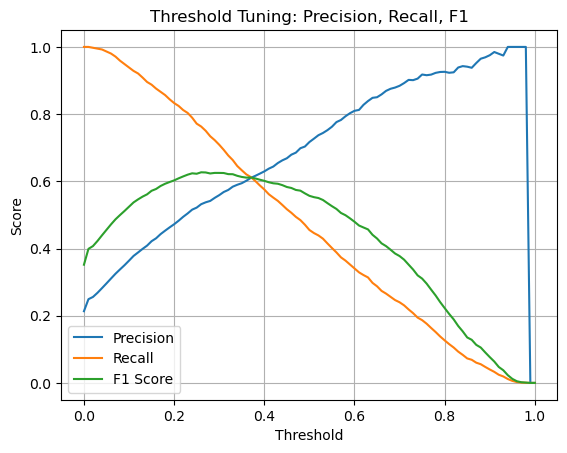

In [90]:
import matplotlib.pyplot as plt

results = np.array(results)
plt.plot(results[:, 0], results[:, 1], label='Precision')
plt.plot(results[:, 0], results[:, 2], label='Recall')
plt.plot(results[:, 0], results[:, 3], label='F1 Score')

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning: Precision, Recall, F1")
plt.legend()
plt.grid(True)
plt.show()


In [91]:
best_f1_idx = results[:, 3].argmax()
best_threshold = results[best_f1_idx, 0]
print(f"Best threshold for F1: {best_threshold}")

Best threshold for F1: 0.26


Now that I have the ideal threshold for classification as Fraud, I will use this threshold for getting the metrics for the test data.

In [92]:
y_proba = best_model.predict_proba(X_test)[:, 1] 
final_preds = (y_proba >= best_threshold).astype(int)

In [93]:
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)
print(f"Final Precision: {precision}")
print(f"Final Recall:    {recall}")
print(f"Final f1-score:  {f1}")

Final Precision: 0.5285754904748365
Final Recall:    0.7529364115026327
Final f1-score:  0.6211159371867692


In [111]:
nonFraud = len(np.where(final_preds==0)[0]) 
fraud = len(np.where(final_preds==1)[0])  
total = len(final_preds)
print(f"nonFraud preds: {nonFraud}")
print(f"Fraud preds: {fraud}")
print(f"Total preds: {total}")
nonFraudFrac = nonFraud/total
fraudFrac = fraud/total
print(f"Fraction of nonFraud preds: {nonFraudFrac}")  
print(f"Fraction of Fraud preds: {fraudFrac}")
false_positives = np.where((final_preds == 1) & (y_test == 0))[0]
fp_count = len(false_positives)
print(f"Number of false positives: {fp_count}")
print(f"False positive rate: {fp_count/len(y_test):.4f}")

nonFraud preds: 8049
Fraud preds: 3517
Total preds: 11566
Fraction of nonFraud preds: 0.6959190731454262
Fraction of Fraud preds: 0.3040809268545738
Number of false positives: 1658
False positive rate: 0.1434


In [109]:
y_test.value_counts()

isFraud
False    9097
True     2469
Name: count, dtype: int64

The model now has a balanced performance with a f1 score of 0.62. With a recall of 0.75, 3 out of 4 fraudulent transactions will be identified correctly. With a precision of 0.52, there will still be some false positives. However, as visible from the test data above, False Positive Rate is 14.34%. This is a reasonable trade-off since the costs of fraud transactions is much higher than non fraud transactions. 

# Feature Importance

Since the HistGradientBoostingClassifier implementation of sklearn does not output feature importance, I attempted to explain the importances through permutation_importance. Source: https://github.com/scikit-learn/scikit-learn/issues/15132 

I also wanted to use my fine tuned threshold while evaluating the feature importance, so I had to implement a custom wrapper which will use my threshold, since permutation_importance internally uses model.predict with a 0.5 threshold without an option to customzie the threshold.

In [81]:
from sklearn.base import BaseEstimator, ClassifierMixin

class ThresholdWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, threshold=0.26):
        self.model = model
        self.threshold = threshold

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        proba = self.model.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def score(self, X, y):
        from sklearn.metrics import f1_score
        return f1_score(y, self.predict(X))


In [82]:
from sklearn.inspection import permutation_importance

wrapped_model = ThresholdWrapper(model=best_model, threshold=0.26)

result = permutation_importance(
    wrapped_model, X_test, y_test,
    scoring='f1',  
    n_repeats=30,
    random_state=42,
    n_jobs=-1
)


In [112]:
importances_mean = result.importances_mean
feature_names    = X_test.columns
sorted_idx       = np.argsort(importances_mean)[::-1]

print("Feature permutation importances (sorted):")
for idx in sorted_idx:
    print(f"{feature_names[idx]:<20}  {importances_mean[idx]:.4f}")

Feature permutation importances (sorted):
cumFraudCount         0.2375
transactionCountLast7d  0.0800
relativeTxnAmt        0.0762
posEntryMode          0.0632
dayOfYear             0.0449
merchantName          0.0207
merchantTransactionFrequency  0.0146
amountSpentLast7d     0.0131
merchantCategoryCode  0.0092
custAvgTxnAmt         0.0075
transactionType       0.0069
cardPresent           0.0046
isNewMerchantForCustomer  0.0034
posConditionCode      0.0031
currentBalance        0.0025
timeSinceLastTransaction  0.0024
creditLimit           0.0023
transactionCountLast24hr  0.0022
amountSpentLast24hr   0.0022
amtAvailableRatio     0.0020
numMerchantsVisitedToday  0.0019
typicalHour           0.0016
accountAge            0.0008
merchantCountryCode   0.0008
amtCreditLimitRatio   0.0008
month                 0.0005
meanTransactionAmountPastWeek  0.0004
acqCountry            0.0004
isFrequentMerchantCountry  0.0002
cvvMatch              0.0001
transactionCountLast1hr  0.0001
isFirstTransacti

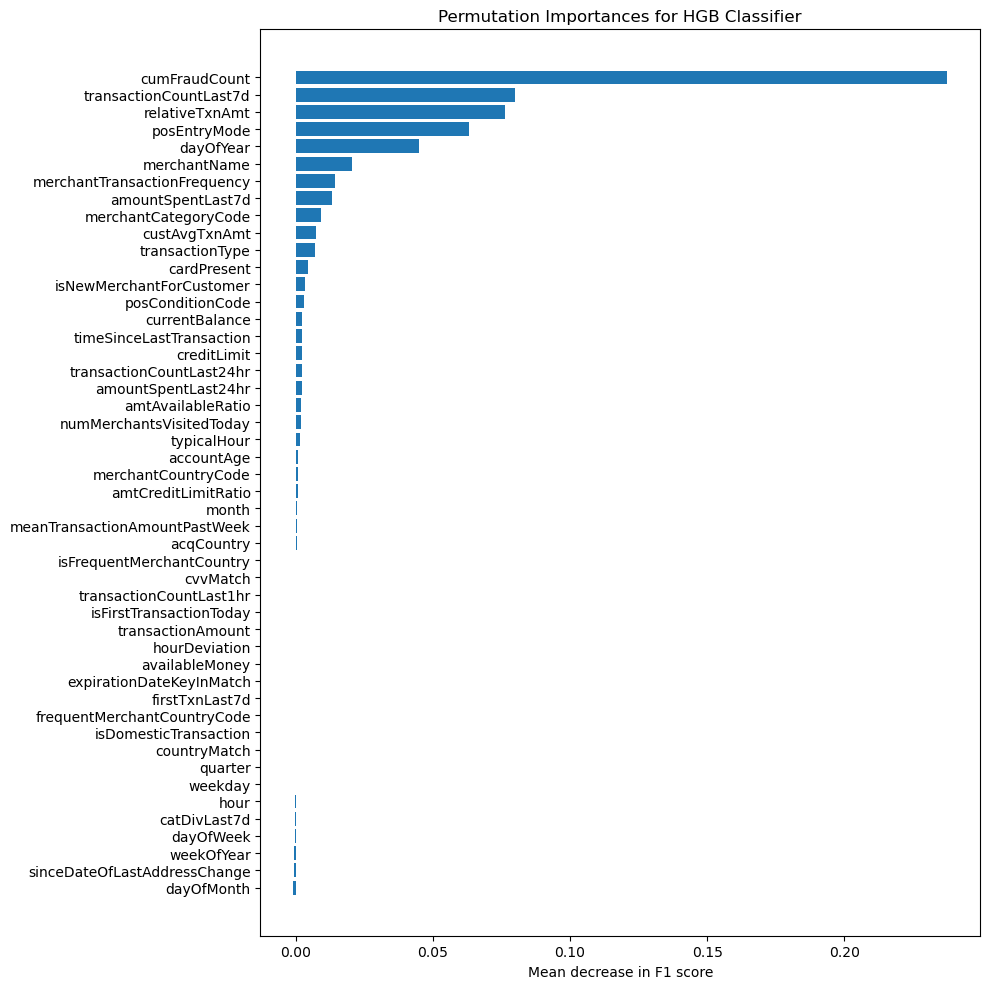

In [113]:
plt.figure(figsize=(10,10))
plt.barh(
    feature_names[sorted_idx],
    importances_mean[sorted_idx],
    align='center'
)
plt.xlabel("Mean decrease in F1 score")
plt.title("Permutation Importances for HGB Classifier")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

These feature importances do make logical sense to me. The model values features that capture recent user behavior and account history more than static transaction details isolated to that transaction.
* cumFraudCount stands out by a wide margin — it’s the single most predictive feature. This makes sense: accounts with a history of fraud are much more likely to have frauds again, or may be compromised long-term. This could be inherently susceptible customers who repeatedly fall victim to fraud, like senior citizens who are taken advantage of.
* transactionCountLast7d and relativeTxnAmt also rank high, indicating that recent activity spikes and irregular transaction amounts relative to a customer's norm are strong fraud indicators. These features help capture behavioral drift and sudden changes in spending habits.
* posEntryMode and dayOfYear suggest that how and when a transaction occurs matters — certain entry methods (like manually keyed cards) and specific timeframes may carry higher risk.
* Merchant metadata still contribute, but not as much as other features. Some merchant categories (like electronics or luxury goods) could be more commonly targeted in fraud due to higher transaction value.

# Answer 4

**Data Cleaning & Feature Engineering** 

I started by removing empty, redundant, and duplicate columns, then engineered a set of behavioral and contextual features. My final features included:

* Match checks (e.g., whether the entered CVV matches the real one, or if the acquiring country matches the merchant’s).
* Account-related timing, like days since account opening or last address change.
* Time-based behavior, such as part of day, day of week, hour, and whether the transaction was the first of the day.
* Rolling transaction activity, like transaction counts and total spend over 1-hour, 24-hour, and 7-day windows.
* Merchant patterns, including whether the customer had seen the merchant before, how frequently a merchant appears across the dataset, and how diverse the customer's spending categories were in the past week.
* Behavioral baselines, such as the customer's typical transaction hour, average spend, and deviation from these norms.
* Cumulative fraud history per customer.

These features were designed to capture both short-term spikes in behavior and longer-term patterns, which are often strong indicators in fraud detection.

**Sampling Strategy** \
Given the heavy class imbalance in fraud data, I sampled:

* All fraud transactions for each customer who has experienced fraud.
* A 7.5% sample of non-fraud transactions from those same customers, to retain relevant context.
* A 1% sample of non-fraud transactions from customers who have never experienced fraud, to introduce noise and avoid overfitting to a fraud-heavy subset.

This was selected after some trial and error with the 3 models 

**Modeling Approach** 

I split the data into train, validation, and test sets (60/20/20). Features were categorized into numeric, ordinal, and categorical, and transformed using a sklearn ColumnTransformer. 

I experimented with three models: Logistic Regression, Random Forest, and HistGradientBoostingClassifier.

* Logistic Regression
* Random Forest
* HistGradientBoostingClassifier (HGB)

Logistic Regression was a good starting point because it’s simple and easy to interpret. Random Forest helped capture more complex patterns in the data, but was ultimately overfitting. In the end, HistGradientBoostingClassifier worked best — it was fast and was great at picking up subtle fraud signals.

Each pipeline included a VarianceThreshold feature selector, and I ran grid search to optimize ROC AUC.\
I chose to optimize for ROC AUC because it gives a balanced view of how well the model separates fraud from non-fraud across all classification thresholds. This allowed me to later fine-tune the decision threshold specifically for F1 score, depending on the trade-off between false positives and false negatives.

**Threshold Tuning**

Since fraud is rare, raw predicted probabilities are usually low, and using a default 0.5 threshold would miss most fraud cases. After selecting the best model (HistGradientBoostingClassifier with a ROC AUC of 87.42), I fine-tuned the threshold using the validation set by sweeping values from 0.0 to 1.0, selecting the threshold that maximized F1 score (to balance precision and recall). This threshold came out to be 0.26, showing that the model is not very confident about fraud classifications simply because of the sheer non fraud samples. 

**Final Metrics on Test Set**
    
With the selected threshold, the final performance on the test set was:

Precision: 0.53\
Recall: 0.75\
F1-score: 0.62\
FPR: 0.14\
The model effectively identifies most fraudulent cases, while keeping false positives at a manageable level.

**Feature Importance**

Since HistGradientBoostingClassifier doesn’t expose importances directly, I used permutation importance and implemented a custom model wrapper to ensure it used my fine-tuned threshold (since the default is 0.5).

**Key findings:**

* cumFraudCount was the most predictive feature, showing that prior fraud involvement is a strong signal — likely reflecting either high-risk customers or compromised accounts.
* transactionCountLast7d and relativeTxnAmt were also highly ranked, indicating that sudden changes in activity or abnormal spend levels are common red flags.
* posEntryMode and dayOfYear show that how and when a transaction happens can influence risk — e.g., manually entered cards and certain periods may be riskier.
* Merchant metadata like category and frequency contributed to the model but played a supporting role, providing additional context rather than being primary features.

**With more time**, I would explore a larger hyperparameter grid. I kept the current grid fairly limited due to the computational cost of grid search, but a broader search could help fine-tune the model further.

I’d also be interested in experimenting with attention-based models, which might be better at capturing complex transaction patterns and sequential behavior, especially in customer histories.

Additionally, I’d look into better understanding the nature of false positives and whether certain types of fraud require separate treatment. If there was more context around why a transaction was fraud, it might be useful to be able to incorporate the fraud type.

**What didn't work:**

At first, I tried sampling the data so that it was perfectly balanced between fraud and non-fraud transactions, by undersampling nonfraud cases to be equal to fraud. The idea was to give the model an equal chance to learn both classes. But in reality, it led to really poor precision. The model started flagging way too many legitimate transactions as fraud.

That kind of tradeoff wouldn’t work in a real banking environment, where false alarms would frustrate customers and overwhelm fraud teams. So I moved away from strict balancing and instead went with a sampling approach that gave the model enough fraud to learn from, while keeping the number of false positives more reasonable.